In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import math
import json

In [2]:
accidents = pd.read_csv("datasets/total-accidents-anpc.csv")

C:\Users\hugoa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
accidents.head()

,Numero,DataOcorrencia,DataFechoOperacional,Natureza,EstadoOcorrencia,Distrito,Concelho,Freguesia,Localidade,Latitude,Longitude,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos,NumeroMeiosAereosEnvolvidos,NumeroOperacionaisAereosEnvolvidos
0,2016150002576,09/01/2016 14:02:00,09/01/2016 17:30:00,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,SETÚBAL,MOITA,Gaio-Rosário e Sarilhos Pequenos,Gaio- Rosario,"38,68091202","-9,002235449",1.0,3.0,0.0,0.0
1,2016010098470,10/01/2016 00:30:00,NaN,Protecção e Assistência a Pessoas e Bens / Ass...,Em Curso,AVEIRO,ALBERGARIA-A-VELHA,Albergaria-a-Velha e Valmaior,Rua 25 de Abril - Assilhó - Albergaria-a-Velha,"40,6927855","-8,479686736",0.0,0.0,0.0,0.0
2,2016020002249,24/01/2016 18:57:00,24/01/2016 19:53:00,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,BEJA,CASTRO VERDE,Castro Verde e Casével,"CASTRO VERDE-Rua Bento J. Carraça,6","37,71278977","-8,091107843",2.0,4.0,0.0,0.0
3,2016050041560,30/01/2016 23:38:00,NaN,Protecção e Assistência a Pessoas e Bens / Ass...,Em Curso,CASTELO BRANCO,VILA DE REI,Vila de Rei,Vila de Rei,"39,6684201","-8,146938534",1.0,2.0,0.0,0.0
4,2016020003825,13/02/2016 00:10:00,13/02/2016 01:35:00,Protecção e Assistência a Pessoas e Bens / Ass...,Encerrada,BEJA,CASTRO VERDE,Santa Bárbara de Padrões,"SETE-Rua da Graça, 4","37,6149714","-7,962115173",1.0,2.0,0.0,0.0


In [4]:
uniquen = accidents['Natureza'].unique()
n = accidents['Natureza'].value_counts()
##n[20:40]

In [5]:
ROAD_ACCIDENTS = ['Protecção e Assistência a Pessoas e Bens / Assistência e Prevenção a actividades humanas / Limpeza de Via e Sinalização de Perigo',
 'Riscos Tecnológicos / Acidentes / Colisão rodoviária',
 'Riscos Tecnológicos / Acidentes / Atropelamento rodoviário',
 'Riscos Tecnológicos / Acidentes / Despiste',
 'Riscos Tecnológicos / Incêndios em Transportes / Rodoviário',
 'Riscos Tecnológicos / Acidentes / Acidentes com veículos fora de estrada']

NON_ROAD_ACCIDENTS = [x for x in uniquen if not x in ROAD_ACCIDENTS]
ROAD_ACCIDENTS
                  
ROAD_ACCIDENTS

['Protecção e Assistência a Pessoas e Bens / Assistência e Prevenção a actividades humanas / Limpeza de Via e Sinalização de Perigo',
 'Riscos Tecnológicos / Acidentes / Colisão rodoviária',
 'Riscos Tecnológicos / Acidentes / Atropelamento rodoviário',
 'Riscos Tecnológicos / Acidentes / Despiste',
 'Riscos Tecnológicos / Incêndios em Transportes / Rodoviário',
 'Riscos Tecnológicos / Acidentes / Acidentes com veículos fora de estrada']

In [6]:
accidents = accidents.drop(accidents[accidents['Distrito'] == '0'].index)

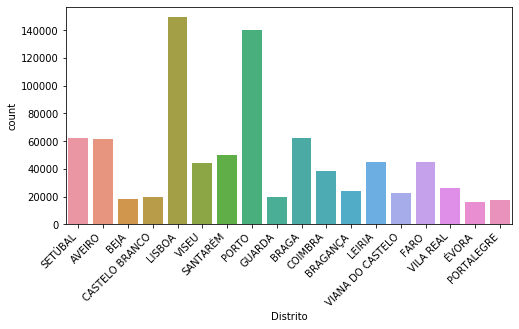

In [7]:
plt.figure(figsize=(8,4))
chart = sns.countplot(x="Distrito",data = accidents)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [8]:
discriminate = accidents.copy()
discriminate['Natureza'].replace(ROAD_ACCIDENTS,'ROAD ACCIDENT',inplace=True)
discriminate['Natureza'].replace(NON_ROAD_ACCIDENTS,'OTHER',inplace=True)
discriminate.head()

,Numero,DataOcorrencia,DataFechoOperacional,Natureza,EstadoOcorrencia,Distrito,Concelho,Freguesia,Localidade,Latitude,Longitude,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos,NumeroMeiosAereosEnvolvidos,NumeroOperacionaisAereosEnvolvidos
0,2016150002576,09/01/2016 14:02:00,09/01/2016 17:30:00,OTHER,Encerrada,SETÚBAL,MOITA,Gaio-Rosário e Sarilhos Pequenos,Gaio- Rosario,"38,68091202","-9,002235449",1.0,3.0,0.0,0.0
1,2016010098470,10/01/2016 00:30:00,NaN,ROAD ACCIDENT,Em Curso,AVEIRO,ALBERGARIA-A-VELHA,Albergaria-a-Velha e Valmaior,Rua 25 de Abril - Assilhó - Albergaria-a-Velha,"40,6927855","-8,479686736",0.0,0.0,0.0,0.0
2,2016020002249,24/01/2016 18:57:00,24/01/2016 19:53:00,OTHER,Encerrada,BEJA,CASTRO VERDE,Castro Verde e Casével,"CASTRO VERDE-Rua Bento J. Carraça,6","37,71278977","-8,091107843",2.0,4.0,0.0,0.0
3,2016050041560,30/01/2016 23:38:00,NaN,OTHER,Em Curso,CASTELO BRANCO,VILA DE REI,Vila de Rei,Vila de Rei,"39,6684201","-8,146938534",1.0,2.0,0.0,0.0
4,2016020003825,13/02/2016 00:10:00,13/02/2016 01:35:00,OTHER,Encerrada,BEJA,CASTRO VERDE,Santa Bárbara de Padrões,"SETE-Rua da Graça, 4","37,6149714","-7,962115173",1.0,2.0,0.0,0.0


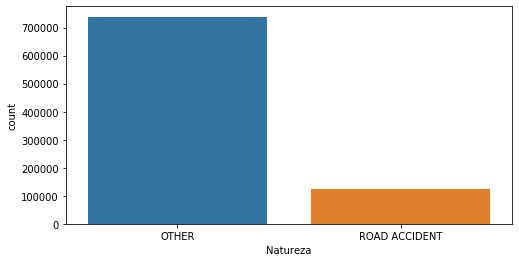

In [20]:
plt.figure(figsize=(8,4))
chart = sns.countplot(x="Natureza",data = discriminate)
plt.show()

In [21]:
ROAD_ACCIDENTS

['Protecção e Assistência a Pessoas e Bens / Assistência e Prevenção a actividades humanas / Limpeza de Via e Sinalização de Perigo',
 'Riscos Tecnológicos / Acidentes / Colisão rodoviária',
 'Riscos Tecnológicos / Acidentes / Atropelamento rodoviário',
 'Riscos Tecnológicos / Acidentes / Despiste',
 'Riscos Tecnológicos / Incêndios em Transportes / Rodoviário',
 'Riscos Tecnológicos / Acidentes / Acidentes com veículos fora de estrada']

In [22]:
NEW_NATURE = ["Limpeza e Sinalização da via","Colisão rodoviária",
              "Atropelamento","Despiste","Incendio rodoviário",
              "Acidentes com veículos fora da estrada"]

In [23]:
for x in NON_ROAD_ACCIDENTS:
    accidents.drop(accidents[accidents['Natureza'] == x].index,inplace=True)

In [24]:
for x in range(len(ROAD_ACCIDENTS)):
    accidents['Natureza'].replace(ROAD_ACCIDENTS[x],NEW_NATURE[x],inplace=True)


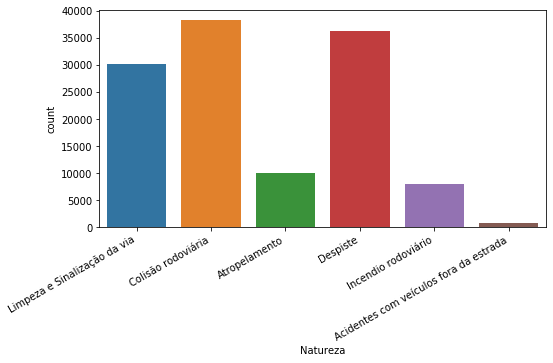

In [25]:
plt.figure(figsize=(8,4))
chart = sns.countplot(x="Natureza",data = accidents)
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

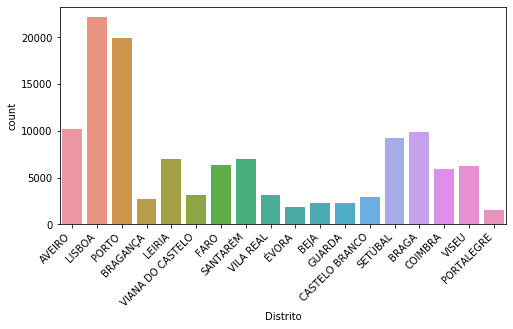

In [26]:
plt.figure(figsize=(8,4))
chart = sns.countplot(x="Distrito",data = accidents)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [27]:
accidents.dtypes

Numero                                            object
DataOcorrencia                            datetime64[ns]
DataFechoOperacional                      datetime64[ns]
Natureza                                          object
EstadoOcorrencia                                  object
Distrito                                          object
Concelho                                          object
Freguesia                                         object
Localidade                                        object
Latitude                                         float64
Longitude                                        float64
NumeroMeiosTerrestresEnvolvidos                  float64
NumeroOperacionaisTerrestresEnvolvidos           float64
NumeroMeiosAereosEnvolvidos                      float64
NumeroOperacionaisAereosEnvolvidos               float64
dtype: object

In [28]:
def get_date(x):
    
    if type(x) is float and math.isnan(x):
        return x
    return datetime.datetime.strptime(x, '%d/%m/%Y %H:%M:%S')

response_s = [get_date(x) for x in accidents['DataOcorrencia']]
accidents['DataOcorrencia'] = response_s

response_c = [get_date(x) for x in accidents['DataFechoOperacional']]
accidents['DataFechoOperacional'] = response_c

latitudes  = [float(str(x).replace(",",".")) for x in accidents['Latitude']]
longitudes = [float(str(x).replace(",",".")) for x in accidents['Longitude']]

accidents['Latitude'] = latitudes
accidents['Longitude'] = longitudes


TypeError: strptime() argument 1 must be str, not Timestamp

In [29]:
accidents.head(20)

,Numero,DataOcorrencia,DataFechoOperacional,Natureza,EstadoOcorrencia,Distrito,Concelho,Freguesia,Localidade,Latitude,Longitude,NumeroMeiosTerrestresEnvolvidos,NumeroOperacionaisTerrestresEnvolvidos,NumeroMeiosAereosEnvolvidos,NumeroOperacionaisAereosEnvolvidos
1,2016010098470,2016-01-10 00:30:00,NaT,Limpeza e Sinalização da via,Em Curso,AVEIRO,ALBERGARIA-A-VELHA,Albergaria-a-Velha e Valmaior,Rua 25 de Abril - Assilhó - Albergaria-a-Velha,40.692785,-8.479687,0.0,0.0,0.0,0.0
15,2016110047730,2016-03-14 09:00:00,2016-03-14 10:20:00,Colisão rodoviária,Encerrada,LISBOA,ALENQUER,Alenquer (Santo Estêvão e Triana),Alenquer,39.054242,-9.007918,1.0,2.0,0.0,0.0
25,2016130038635,2016-03-14 08:28:00,2016-03-14 09:15:00,Atropelamento,Encerrada,PORTO,VILA DO CONDE,Vila do Conde,Vila do Conde,41.352471,-8.735384,1.0,2.0,0.0,0.0
26,2016130038634,2016-03-14 08:25:00,2016-03-14 09:05:00,Limpeza e Sinalização da via,Encerrada,PORTO,SANTO TIRSO,Negrelos (São Tomé),NEGRELOS (SÃO TOMÉ),41.347422,-8.406756,1.0,2.0,0.0,0.0
27,2016040007263,2016-03-14 08:22:00,2016-03-14 09:55:00,Limpeza e Sinalização da via,Encerrada,BRAGANÇA,VILA FLOR,Vila Flor e Nabo,VILA FLOR E NABO,41.280009,-7.133590,1.0,2.0,0.0,0.0
28,2016100013876,2016-03-14 08:22:00,2016-03-14 08:54:00,Despiste,Encerrada,LEIRIA,LEIRIA,"Leiria, Pousos, Barreira e Cortes",POUSOS,39.743021,-8.777106,1.0,2.0,0.0,0.0
29,2016160006764,2016-03-14 08:22:00,2016-03-14 12:05:00,Limpeza e Sinalização da via,Encerrada,VIANA DO CASTELO,PONTE DE LIMA,Arca e Ponte de Lima,Ponte de Lima-Via Foral Dª Teresa,41.761526,-8.577281,3.0,7.0,0.0,0.0
39,2016010019175,2016-03-14 07:59:00,2016-03-14 09:35:00,Despiste,Encerrada,AVEIRO,VAGOS,Sosa,SALGUEIRO,40.565985,-8.627893,2.0,4.0,0.0,0.0
44,2016080010908,2016-03-15 14:29:00,2016-03-15 16:30:00,Colisão rodoviária,Encerrada,FARO,TAVIRA,Tavira (Santa Maria e Santiago),TAVIRA,37.130442,-7.646910,1.0,2.0,0.0,0.0
45,2016140014699,2016-03-15 11:31:00,2016-12-22 01:00:00,Limpeza e Sinalização da via,Encerrada,SANTARÉM,GOLEGÃ,Golegã,Terminal Golegã >> Riachos,39.409014,-8.476769,0.0,0.0,0.0,0.0


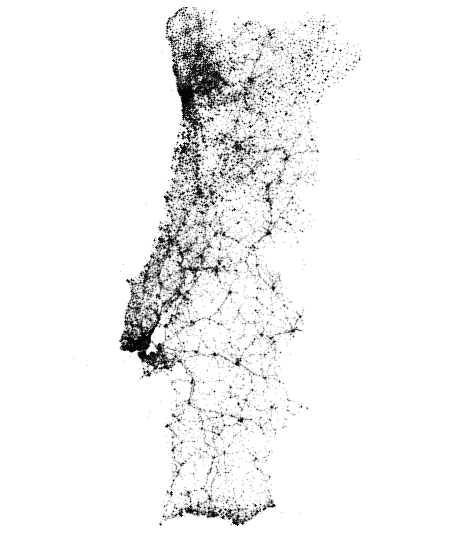

In [30]:
plt.figure(figsize=(8,10))
plt.scatter(accidents.Longitude,accidents.Latitude,s=0.2,alpha=0.2,color='black')
plt.xlim(-11,-5)
plt.ylim(36.75,42)
plt.axis('off')
plt.show()

In [50]:
accidents.drop(accidents[accidents['Distrito'] != 'BRAGA'].index)['Distrito'].unique()

array(['BRAGA'], dtype=object)

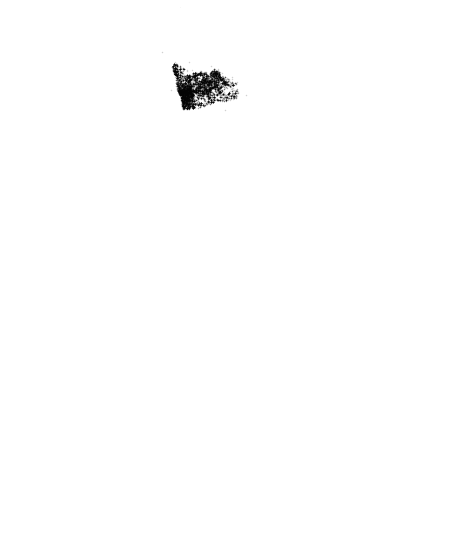

19896


In [66]:
def show_accidents_district(district,lon_min=-11,lon_max=-5,lat_min = 36.75,lat_max=42):
    accidents_district = accidents.drop(accidents[accidents['Distrito'] != district].index)
    plt.figure(figsize=(8,10))
    plt.scatter(accidents_district.Longitude,accidents_district.Latitude,s=0.2,alpha=0.2,color='black')
    plt.xlim(lon_min,lon_max)
    plt.ylim(lat_min,lat_max)
    plt.axis('off')
    plt.show()
    print(len(accidents_district))

show_accidents_district('PORTO')

In [31]:
len(accidents)

123613

In [32]:
accidents.to_csv("datasets/road-accidents.csv",index = False)

{'Faro': <shapely.prepared.PreparedGeometry at 0x26dcd61d948>,
 'Beja': <shapely.prepared.PreparedGeometry at 0x26ddca7ab88>,
 'Viseu': <shapely.prepared.PreparedGeometry at 0x26ddca7ac88>,
 'Guarda': <shapely.prepared.PreparedGeometry at 0x26ddca7ad08>,
 'Coimbra': <shapely.prepared.PreparedGeometry at 0x26ddca7aa08>,
 'Aveiro': <shapely.prepared.PreparedGeometry at 0x26ddca7ae88>,
 'SetÃºbal': <shapely.prepared.PreparedGeometry at 0x26ddca7af08>,
 'Viana do Castelo': <shapely.prepared.PreparedGeometry at 0x26ddca7af88>,
 'Vila Real': <shapely.prepared.PreparedGeometry at 0x26ddca7aa88>,
 'BraganÃ§a': <shapely.prepared.PreparedGeometry at 0x26ddca7c148>,
 'Braga': <shapely.prepared.PreparedGeometry at 0x26ddca7c1c8>,
 'Ã‰vora': <shapely.prepared.PreparedGeometry at 0x26ddca7c248>,
 'Lisboa': <shapely.prepared.PreparedGeometry at 0x26ddca7ad48>,
 'Porto': <shapely.prepared.PreparedGeometry at 0x26ddca7c3c8>,
 'Castelo Branco': <shapely.prepared.PreparedGeometry at 0x26ddca7c448>,
 'San

'Lisboa'